<a href="https://colab.research.google.com/github/Nekokan1500/Machine-Learning/blob/main/Aurelien/Ch3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [16]:
X, y = mnist['data'], mnist['target']
print(X.shape, y.shape)
print(type(X), type(y))

(70000, 784) (70000,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


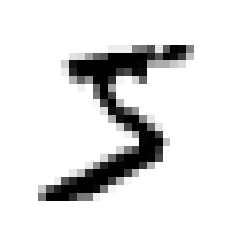

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

some_digit = X.iloc[0].to_numpy()
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
y[0]

'5'

In [73]:
y = y.astype(np.uint8)

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [35]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([ True])

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
y_train_pred.shape

(60000,)

###Values in a confusion matrix for a binary target
[0][0] - true negatives  (TN)   [0][1] - false positives (FP) <br>
[1][0] - false negatives (FN)   [1][1] - true positives (TP)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

###*Precision*
precision = TP/(TP + FP)

###*Recall/Sensitivity/True Positive Rate (TPR)*
recall = TP/(TP + FN)

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

###Precision/Recall Trade-off
Increasing precision reduces recall, and vice versa.

###*F1 Score*
F1 = 2/(1/precision + 1/recall)

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend()
    plt.grid()

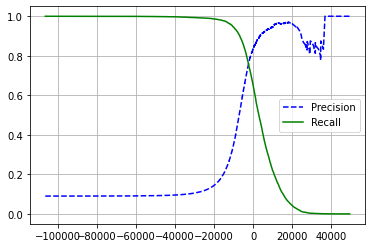

In [ ]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

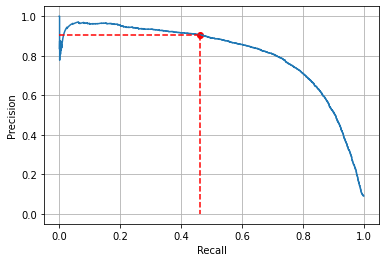

In [ ]:
plt.plot(recalls, precisions)
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.scatter(recalls[57200], precisions[57200], c='r')
plt.plot([recalls[57200],recalls[57200]], [precisions[57200],0], 'r--')
plt.plot([0,recalls[57200]], [precisions[57200],precisions[57200]], 'r--')

In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.019499143958

In [ ]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [ ]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [ ]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

###*ROC Curve: TPR v. FPR*
TPR = Recall <br>
FPR = FP/(TN + FP) <br>
TNR = TN/(TN + FP) (aka. Specifity) <br>
FPR = 1 - TNR


In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

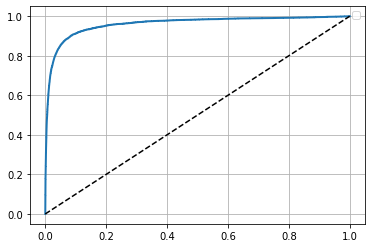

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.legend()
    plt.grid()
    
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, 
                                    method="predict_proba")

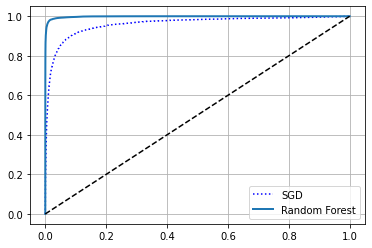

In [ ]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

Text(0, 0.5, 'Precision')

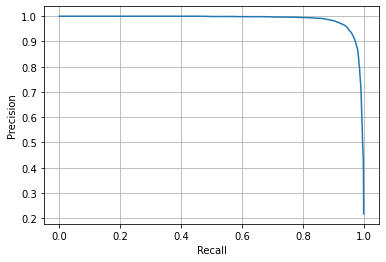

In [ ]:
precisions_forest, recalls_forest, thresholds = precision_recall_curve(y_train_5, y_scores_forest)
plt.plot(recalls_forest, precisions_forest)
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')

###Multiclass Classification
Scikit-Learn detects when trying to use a binary classification algorithm for a multi-class classification task, and it automatically runs OvR or OvO, depending on the algorithm.

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train, not y_train_5
svm_clf.predict([some_digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([5], dtype=uint8)

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [ ]:
np.argmax(some_digit_scores)

5

In [ ]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

In [ ]:
ovr_clf.estimators_

In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

In [ ]:
sgd_clf.decision_function([some_digit])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

###Error Analysis

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1 ,keepdims=True)
row_sums

In [ ]:
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = plt.cm.binary, **options)
    plt.axis("off")

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

###Multilabel Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
knn_clf.predict([some_digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([[False,  True]])

####Evaluation of multilabel model
Here assume each label is binary

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
# one approach is to measure the F1 score for each individual label (or any 
# other binary classifier metric discussed earlier), then simply compute the 
# average score

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

# To give more weight to one of the labels, use
# f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.976410265560605

###Multioutput Classification
A generalization of multilabel classification where each label can be multiclass

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

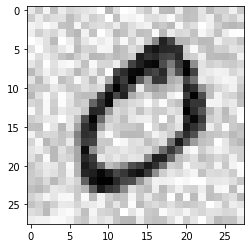

In [ ]:
some_pic = X_train_mod.iloc[1].to_numpy()
some_pic_image = some_pic.reshape(28, 28)
plt.imshow(some_pic_image, cmap='binary')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


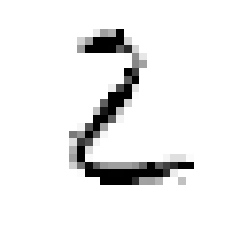

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod.iloc[1]])
plot_digits(clean_digit)

##Exercises

###1. Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = [{'n_neighbors': [3, 4, 5], 'weights': ['uniform', 'distance']}]

knn_clf_new = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf_new, param_grid, cv=5, verbose=3)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  36.5s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  36.8s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  36.5s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  35.6s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  37.3s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  35.4s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  35.5s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  54.6s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  50.7s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  35.3s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  41.0s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [ ]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
grid_search.best_score_

0.9716166666666666

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

###2. Data Augmentation (shifted MNIST images)

In [4]:
from scipy.ndimage.interpolation import shift

array = np.ones([4,4])
print('original image array')
print(array)
print('shift down-right by [1,1]')
array = shift(array, [1,1])
print(array)
print('shift down-left by [1,-1]')
array = np.ones([4,4])
array = shift(array, [1,-1])
print(array)
print('shift up-left by [-1,-1]')
array = np.ones([4,4])
array = shift(array, [-1,-1])
print(array)
print('shift up-right by [-1,1]')
array = np.ones([4,4])
array = shift(array, [-1,1])
print(array)

original image array
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
shift down-right by [1,1]
[[0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]]
shift down-left by [1,-1]
[[0. 0. 0. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]]
shift up-left by [-1,-1]
[[1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]]
shift up-right by [-1,1]
[[0. 1. 1. 1.]
 [0. 1. 1. 1.]
 [0. 1. 1. 1.]
 [0. 0. 0. 0.]]


In [82]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [91]:
X_train_data = X_train.to_numpy()
X_train_shifted = X_train.to_numpy().tolist()
y_train = [label for label in y_train]
y_train_shifted = [label for label in y_train]

for dx, dy in ((-1,0), (1,0), (0,-1), (0,1)):
    for image, label in zip(X_train_data, y_train):
        X_train_shifted.append(shift_image(image, dx, dy))
        y_train_shifted.append(label)

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn_clf.fit(X_train_shifted, y_train_shifted)
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.9763